In [6]:
# coding: utf-8
from __future__ import print_function
from scipy.optimize import fsolve
from scipy import integrate


# 方程组
def func(x):
    x1 = x[0]
    x2 = x[1]
    return [2*x1-x2**2-1, x1**2-x2-2]


result = fsolve(func, [1, 1])
print(result)


# 微积分
def func1(x):
    return (1-x**2)**0.5


p, q = integrate.quad(func1, -1, 1)
print(p)
print(q)
print(p*2)

[1.91963957 1.68501606]
1.57079632679
1.00023545002e-09
3.14159265359


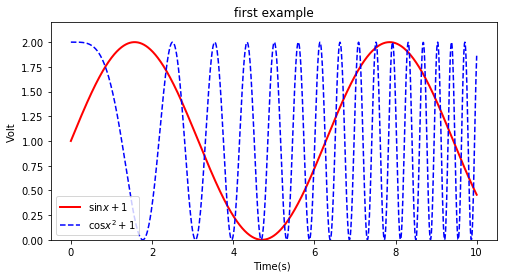

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
y = np.sin(x) + 1
z = np.cos(x**2) + 1

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y, label='$\sin x+1$', color='red', linewidth=2) # 作图，设置标签，线条颜色，线条大小
plt.plot(x, z, 'b--', label='$\cos x^2+1$')
plt.xlabel('Time(s) ')
plt.ylabel('Volt')
plt.title("first example")
plt.ylim(0, 2.2) # 显示的y轴范围
 
plt.legend()
plt.show()

In [2]:
import pandas as pd
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
d = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['a', 'b', 'c'])
d1 = pd.DataFrame(s)

print(d.describe())

             a        b        c
count  2.00000  2.00000  2.00000
mean   2.50000  3.50000  4.50000
std    2.12132  2.12132  2.12132
min    1.00000  2.00000  3.00000
25%    1.75000  2.75000  3.75000
50%    2.50000  3.50000  4.50000
75%    3.25000  4.25000  5.25000
max    4.00000  5.00000  6.00000


In [1]:
from statsmodels.tsa.stattools import adfuller as ADF
import numpy as np

ADF(np.random.rand(100))

(-5.196259693091265,
 8.947995187241737e-06,
 8,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 19.002935945609835)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import svm


model = LinearRegression()
print(model)

# 加载sklearn自带的数据集
data = datasets.load_iris()
print(data.data.shape)

# 建立线性SVM分类器
clf = svm.LinearSVC()
# 用数据训练模型
clf.fit(data.data, data.target)
# 模型训练完成，输入新数据进行预测
clf.predict([[5.0, 3.6, 1.3, 0.25]])
# 查看训练好模型的参数
print(clf.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
(150, 4)
[[ 0.18423153  0.45122677 -0.80794372 -0.45071241]
 [ 0.05204727 -0.88939754  0.40276008 -0.93551265]
 [-0.8506543  -0.9866607   1.38099718  1.86543022]]


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.optimizers import SGD

# 1.模型初始化
model = Sequential()
# 2.添加输入层(20节点)、第一隐藏层(64节点)的连接
model.add(Dense(20, 64))
# 3.第一隐藏层使用tanh作为激活函数
model.add(Activation('tanh'))
# 4.使用Dropout防止过拟合
model.add(Dropout(0.5))
# 5.添加第一隐藏层和第二隐藏层的连接
model.add(Dense(64, 64))
# 6.第二隐藏层使用tanh作为激活函数
model.add(Activation('tanh'))
# 7.使用Dropout防止过拟合
model.add(Dropout(0.5))
# 8.添加第二隐藏层(64节点)、输出层(1节点)的连接
model.add(Dense(64, 1))
# 9.输出层使用sigmoid作为激活函数
model.add(Activation('sigmoid'))

# 定义求解函数
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# 编译生成模型，损失函数为平均误差平方和
model.compile(loss='mean_squared_error', optimizer=sgd)
# 训练模型
model.fit(x_train, y_train, nb_epoch=20, batch_size=16)
# 测试模型
score = model.evaluate(X_test, y_test, batch_size=16)






In [1]:
import numpy as np
print(np.random.rand(20, 64))

[[0.7745205  0.31748974 0.34537929 ... 0.17356078 0.96171159 0.21236886]
 [0.82631987 0.30248079 0.73093968 ... 0.95871752 0.77323582 0.38688553]
 [0.38163336 0.10794426 0.13016209 ... 0.59506386 0.27542531 0.97909146]
 ...
 [0.46000377 0.18725848 0.12244155 ... 0.82879788 0.53338211 0.13995743]
 [0.99686705 0.69004835 0.49722425 ... 0.40233019 0.52922997 0.74783262]
 [0.47666928 0.86234851 0.58361393 ... 0.17811415 0.14418644 0.87011142]]


In [ ]:
import pandas as pd
import matplotlib.pylab as plt


catering_sale = 'data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')
# print(data.describe())

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure()
p = data.boxplot(return_type='dict')

x = p['fliers'][0].get_xdata()  # fliers为异常值标签
y = p['fliers'][0].get_ydata()
y.sort()

for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i]+0.05 - 0.8/(y[i]-y[i-1]), y[i]))
    else:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i]+0.08, y[i]))
plt.show()

In [15]:
# coding: utf-8
import pandas as pd
import matplotlib.pylab as plt


catering_sale = 'data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')
data = data[(data[u'销量'] > 400) & (data[u'销量'] < 5000)]
result = data.describe()
result.loc['range'] = result.loc['max'] - result.loc['min']
result.loc['var'] = result.loc['std'] - result.loc['mean']
result.loc['dis'] = result.loc['75%'] - result.loc['25%']
print(result)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var   -2319.855978
dis     562.600000
